In [78]:
%matplotlib inline
import pandas as pd
import librosa as lib
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio
import scipy
import pyarrow.feather as feather

In [93]:
#import motion dataframe of only participant 1
motion1 = feather.read_feather('Participant_Motion/PID_motion_1')

Reminder of what each look like

In [94]:
motion1.head()

,X,Y,Z,PID
0,159.596,1845.594,1732.156,1
1,159.583,1845.451,1732.144,1
2,159.584,1845.308,1732.126,1
3,159.587,1845.180,1732.105,1
4,159.597,1845.072,1732.103,1


In [81]:
motion1.describe()

,X,Y,Z,PID
count,36001.000000,36001.000000,36001.000000,36001.0
mean,160.456958,1860.184987,1724.088614,1.0
std,4.317600,11.164595,6.404407,0.0
min,144.325000,1829.400000,1715.278000,1.0
25%,158.102000,1852.813000,1718.380000,1.0
50%,161.018000,1859.077000,1721.902000,1.0
75%,163.689000,1866.659000,1732.118000,1.0
max,170.325000,1901.478000,1733.874000,1.0


In [95]:
time = pd.date_range(start='00:00', freq='10L', periods=36001)

In [96]:
time = time.strftime('%M:%S.%f')

In [97]:
motiont = motion1.set_index(time)

In [98]:
motiont.head()

,X,Y,Z,PID
00:00.000000,159.596,1845.594,1732.156,1
00:00.010000,159.583,1845.451,1732.144,1
00:00.020000,159.584,1845.308,1732.126,1
00:00.030000,159.587,1845.180,1732.105,1
00:00.040000,159.597,1845.072,1732.103,1


In [ ]:
segments[0]= data.iloc[0:18000]
segments[1]= data.iloc[18000:20000]
segments[2]= data.iloc[20000:21500]
segments[3]= data.iloc[21500:25500]
segments[4]= data.iloc[25500:27500]
segments[5]= data.iloc[27500:31000]
segments[6]= data.iloc[31000:33000]
segments[7]= data.iloc[33000:36000]

In [17]:
#set the music dataframe index to a time series and upsamplt to match the 100 readings per second from the motion data
motiont = pd.timedelta_range(start='0 S', end='356 S', periods=36001), inplace=True)
musicr = music.resample('10L').mean().ffill()

In [102]:
motiont['segment'] = 'Silence'
motiont.loc['03:00':'03:20', 'segment'] = 'class1'
motiont.loc['03:20':'03:35', 'segment'] = 'class2'
motiont.loc['03:35':'04:15', 'segment'] = 'class3'
motiont.loc['04:15':'04:35', 'segment'] = 'class4'
motiont.loc['04:35':'05:10', 'segment'] = 'hiphop'
motiont.loc['05:10':'05:31', 'segment'] = 'salsa'
motiont.loc['05:31':, 'segment'] = 'edm'

In [ ]:
motion

In [101]:
motion1['segment'].unique()

array(['Silence', 'edm'], dtype=object)

In [77]:
motion1

,X,Y,Z,PID,segment
00:00.000000,159.596,1845.594,1732.156,1,Silence
00:00.010000,159.583,1845.451,1732.144,1,Silence
00:00.020000,159.584,1845.308,1732.126,1,Silence
00:00.030000,159.587,1845.180,1732.105,1,Silence
00:00.040000,159.597,1845.072,1732.103,1,Silence
...,...,...,...,...,...
05:59.960000,160.090,1837.312,1715.629,1,music
05:59.970000,160.122,1837.488,1715.619,1,music
05:59.980000,160.128,1837.653,1715.597,1,music
05:59.990000,160.147,1837.829,1715.599,1,music


In [18]:
print(musicr.shape)
musicr.tail(), music.tail()

(17601, 12)


(                               C   C_sharp         D   D_sharp         E  \
 0 days 00:05:55.960000  0.551258  0.239016  0.590822  0.848327  0.556109   
 0 days 00:05:55.970000  0.486828  0.255034  0.616595  0.832311  0.567619   
 0 days 00:05:55.980000  0.418250  0.280371  0.653649  0.814706  0.601733   
 0 days 00:05:55.990000  0.418250  0.280371  0.653649  0.814706  0.601733   
 0 days 00:05:56         0.370047  0.297515  0.677903  0.787486  0.621999   
 
                                F  F_sharp         G   G_sharp         A  \
 0 days 00:05:55.960000  0.694828      1.0  0.846755  0.592610  0.795401   
 0 days 00:05:55.970000  0.685870      1.0  0.849619  0.508727  0.755731   
 0 days 00:05:55.980000  0.692381      1.0  0.866687  0.420425  0.728755   
 0 days 00:05:55.990000  0.692381      1.0  0.866687  0.420425  0.728755   
 0 days 00:05:56         0.695762      1.0  0.880282  0.364317  0.719848   
 
                          A_sharp         B  
 0 days 00:05:55.960000  0.52080

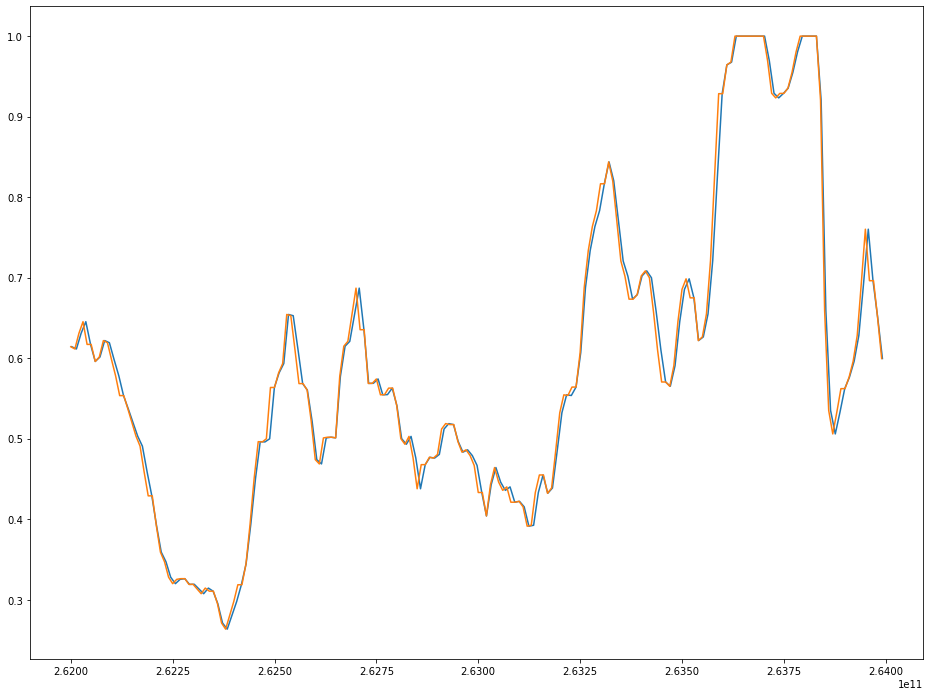

In [19]:
plt.figure(figsize=(16, 12))
plt.plot(music['00:04:22':'00:04:23']['C'])
plt.plot(musicr['00:04:22':'00:04:23']['C'])
plt.show()

In [20]:
musicr.reset_index(drop=True, inplace=True)

### Matching Times Between DataFrames
We need to match the musics and motion DataFrames together. We will create a 'time' column that repersents hundreths of seconds from the start of the motion capture. The music starts at 3 minutes or 18000 hundreths of a second

In [21]:
motion1['time(hs)'] = list(range(0,36001))
musicr['time(hs)'] = list(range(18000,35601))

In [22]:
motion1

,X,Y,Z,PID,time(hs)
0,159.596,1845.594,1732.156,1,0
1,159.583,1845.451,1732.144,1,1
2,159.584,1845.308,1732.126,1,2
3,159.587,1845.180,1732.105,1,3
4,159.597,1845.072,1732.103,1,4
...,...,...,...,...,...
35996,160.090,1837.312,1715.629,1,35996
35997,160.122,1837.488,1715.619,1,35997
35998,160.128,1837.653,1715.597,1,35998
35999,160.147,1837.829,1715.599,1,35999
